In [2]:
from joblib import dump, load

In [3]:
x_train = load('x_train_maccs.pkl')
x_test = load('x_test_maccs.pkl')
x_valid = load('x_valid_maccs.pkl')

In [4]:
y_train = load('y_train.pkl')
y_test = load('y_test.pkl')
y_valid = load('y_valid.pkl')

In [5]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [6]:
seed = 42

In [7]:
cv = StratifiedKFold(n_splits=10, random_state=seed)

D:\Anaconda3\envs\deepchem\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler().fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_valid_scaled = scale.transform(x_valid)

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [144]:
param_grid = {'max_depth': np.arange(1, 11, 1)}

In [145]:
rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=seed, n_estimators=300, max_features=148), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

In [146]:
rf.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=148,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                       

In [147]:
rf.best_params_

{'max_depth': 9}

In [148]:
rf.best_score_

0.7941176470588235

In [164]:
rf_2c8 = RandomForestClassifier(class_weight='balanced', random_state=seed, n_estimators=300, max_features=148) # n_jobs

In [165]:
rf_2c8.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=148,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score, make_scorer, recall_score

In [14]:
matthews = make_scorer(matthews_corrcoef)
specificity = make_scorer(recall_score, pos_label=0)

In [166]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean()

0.7911764705882353

In [167]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='roc_auc').mean()

0.8603258145363408

In [168]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring=matthews).mean()

0.5744907268569655

In [169]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='recall').mean()

0.8389473684210527

In [170]:
cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring=specificity).mean()

0.7238095238095239

In [171]:
y_pred = rf_2c8.predict(x_test_scaled)

In [172]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [173]:
accuracy_score(y_test, y_pred)

0.7850467289719626

In [174]:
roc_auc_score(y_test, rf_2c8.predict_proba(x_test_scaled)[:,1])

0.8248337028824834

In [175]:
matthews_corrcoef(y_test, y_pred)

0.5432666344327188

In [176]:
recall_score(y_test, y_pred)

0.8333333333333334

In [177]:
recall_score(y_test, y_pred, pos_label=0)

0.7073170731707317

In [27]:
import matplotlib.pyplot as plt

0.7911764705882353 49
0.8037383177570093 3


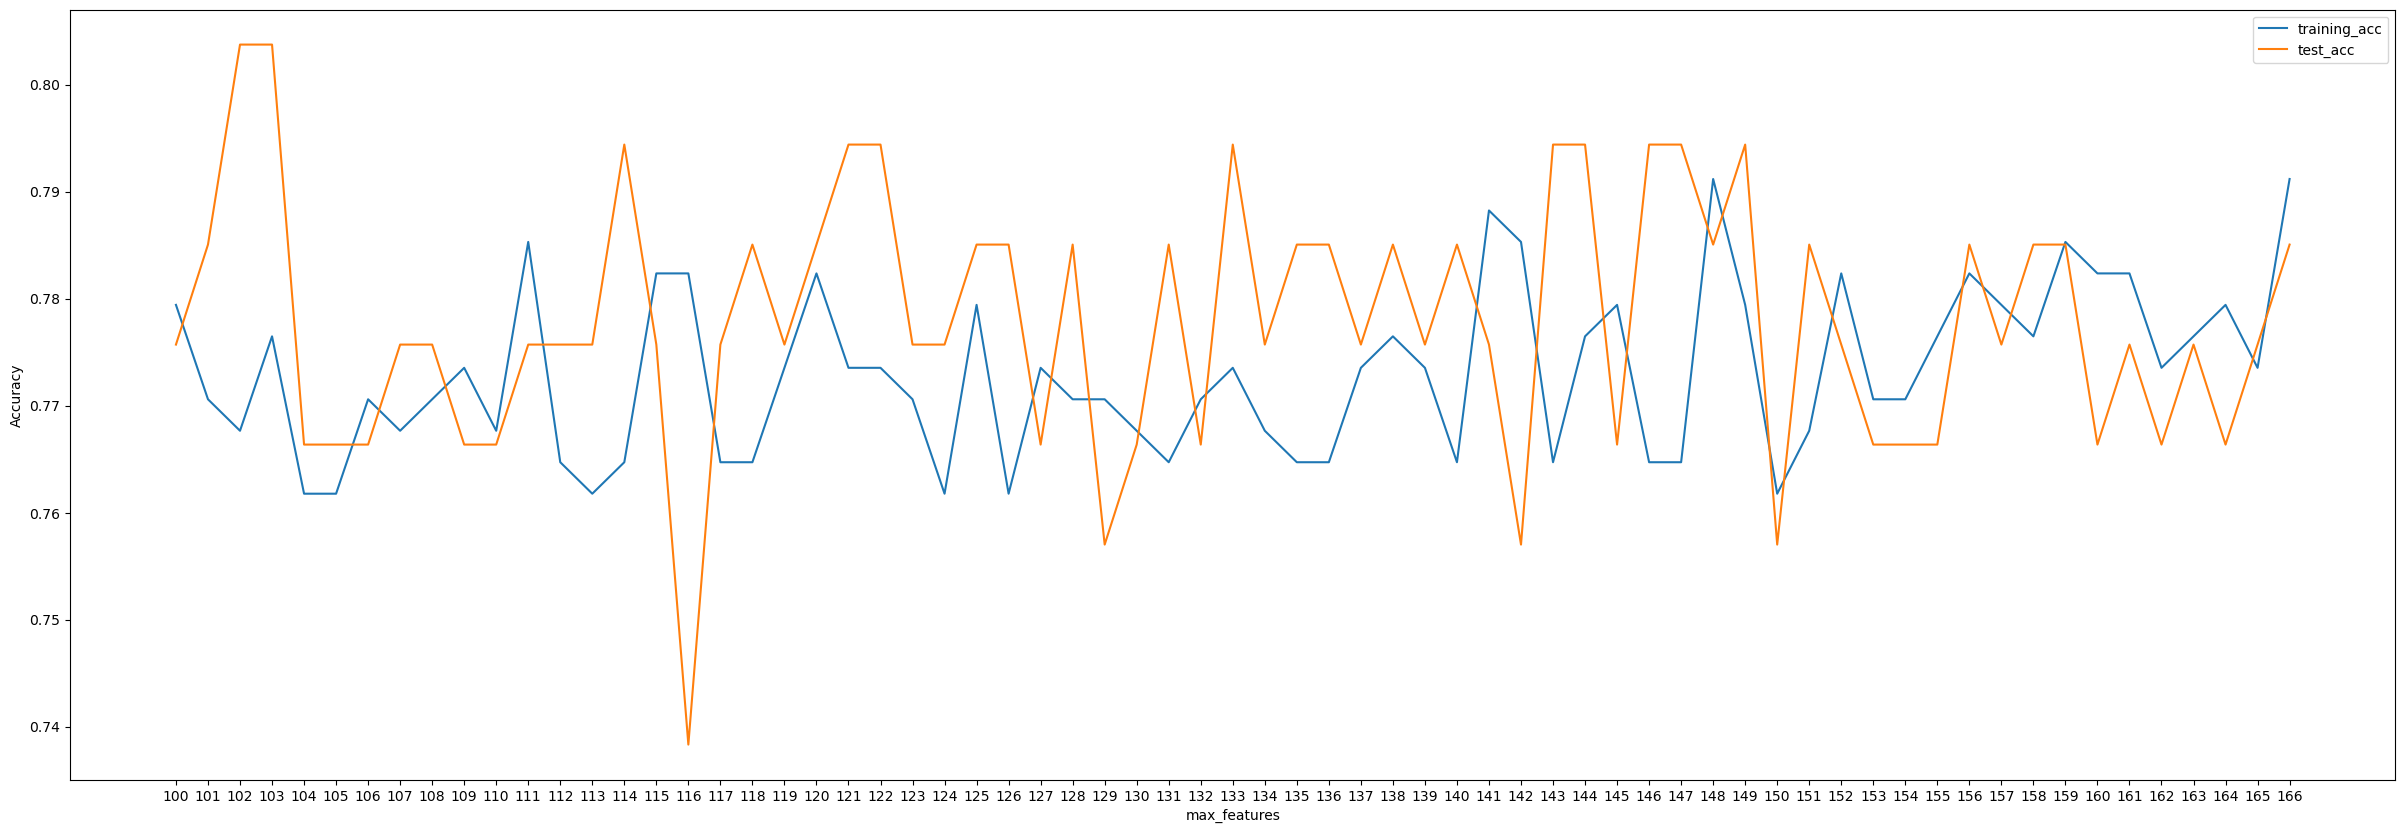

In [31]:
training_acc = []
test_acc = []

for i in np.arange(100, 167, 1):
    rf_2c8 = RandomForestClassifier(class_weight='balanced', random_state=seed, n_estimators=300, max_features=i)
    rf_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = rf_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc)))+1) # index starts from 0
print(max(test_acc),(test_acc.index(max(test_acc)))+1)
plt.figure(figsize=(30, 10))
plt.plot(np.arange(100, 167, 1), training_acc, label="training_acc")
plt.plot(np.arange(100, 167, 1), test_acc, label="test_acc")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
xticks = np.arange(100, 167, 1)
plt.xticks(xticks)
plt.legend()

0.7941176470588235 7
0.794392523364486 2


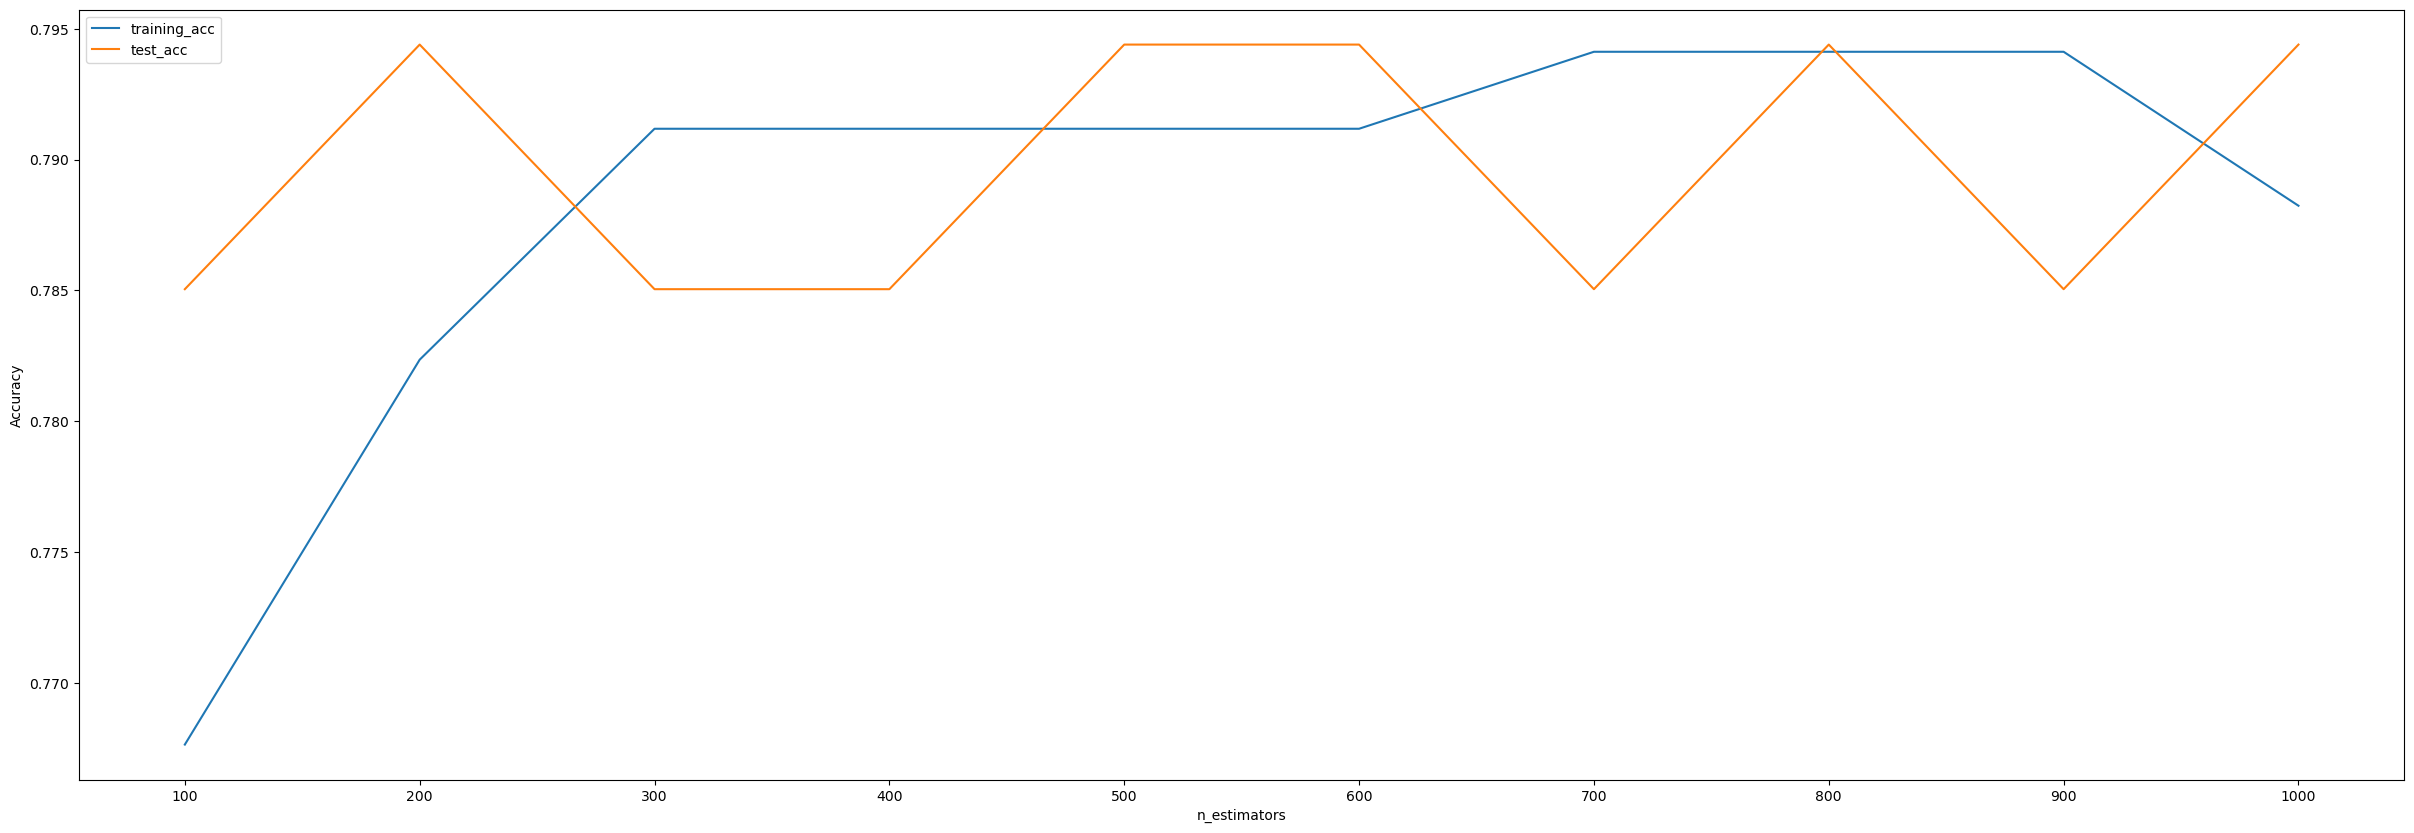

In [185]:
training_acc = []
test_acc = []

for i in np.arange(100, 1100, 100):
    rf_2c8 = RandomForestClassifier(class_weight='balanced', random_state=seed, n_estimators=i, max_features=148)
    rf_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = rf_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc)))+1) # index starts from 0
print(max(test_acc),(test_acc.index(max(test_acc)))+1)
plt.figure(figsize=(30, 10))
plt.plot(np.arange(100, 1100, 100), training_acc, label="training_acc")
plt.plot(np.arange(100, 1100, 100), test_acc, label="test_acc")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
xticks = np.arange(100, 1100, 100)
plt.xticks(xticks)
plt.legend()

0.7941176470588235 9
0.8037383177570093 9


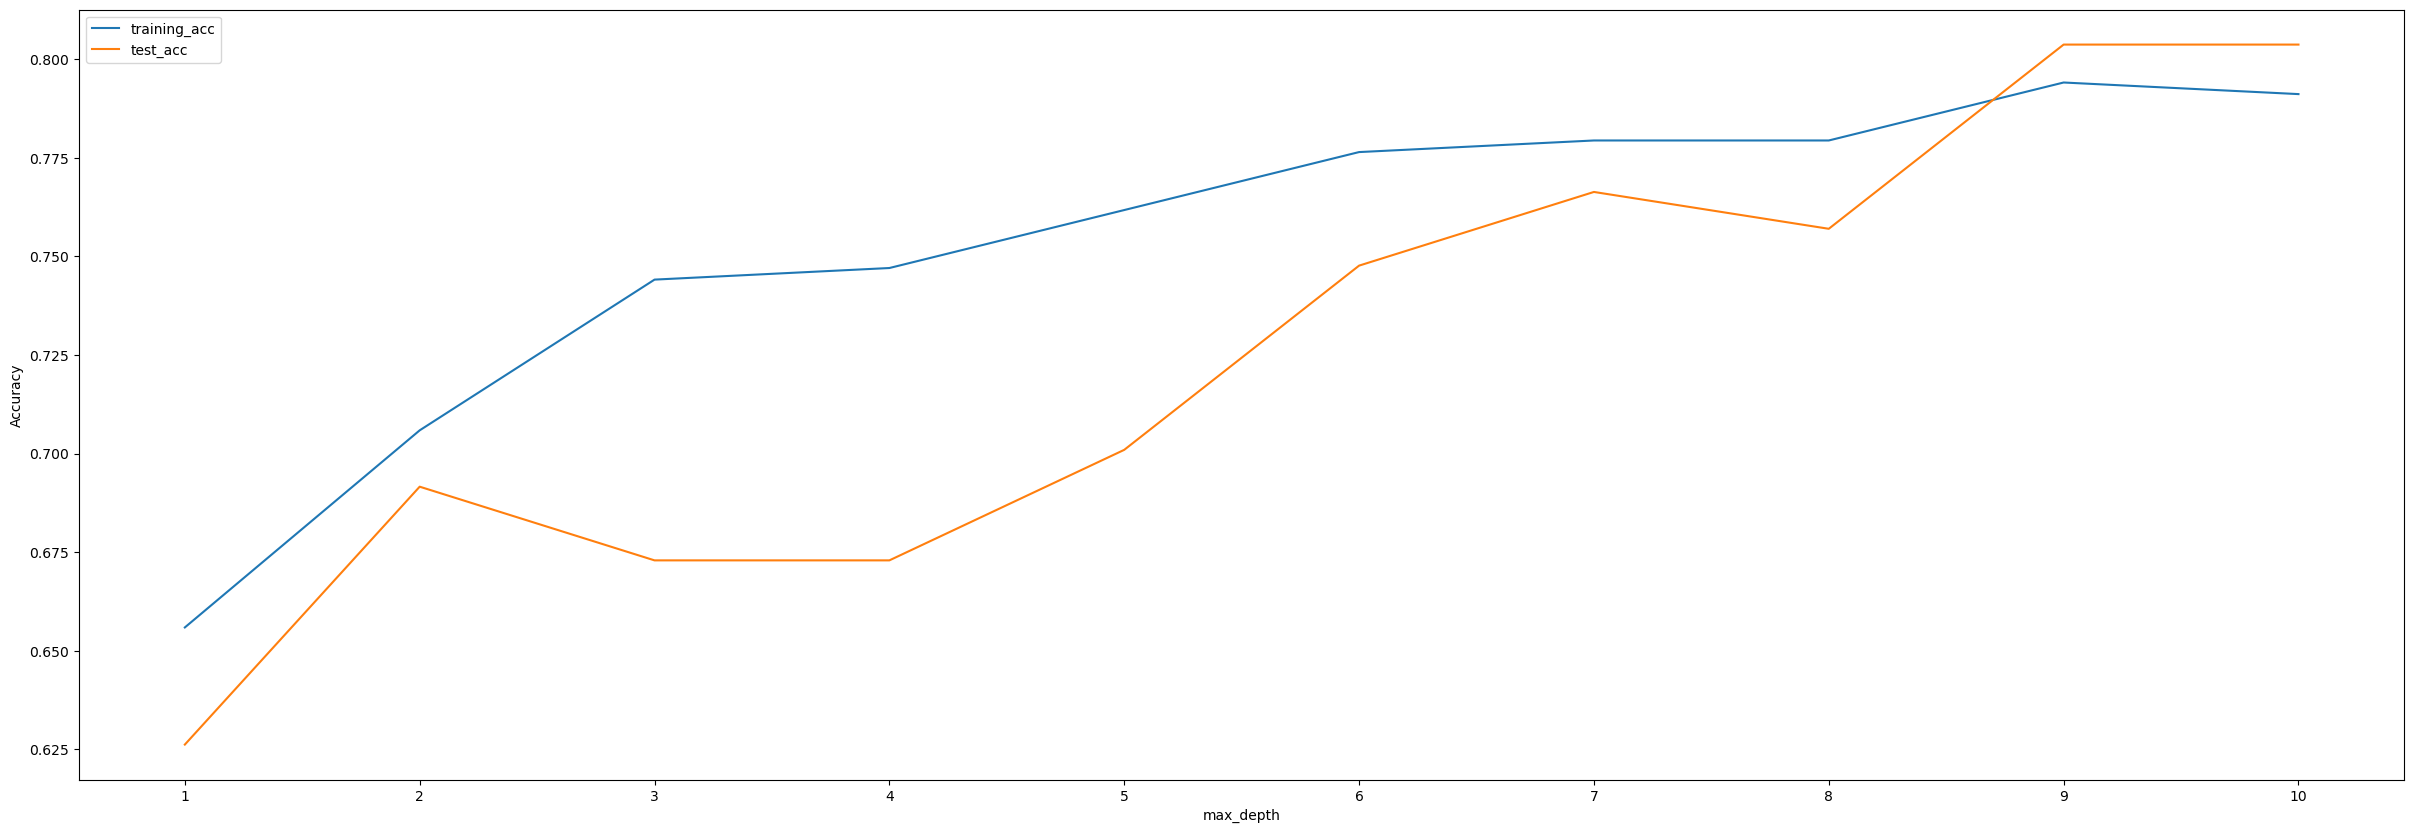

In [149]:
training_acc = []
test_acc = []

for i in np.arange(1, 11, 1):
    rf_2c8 = RandomForestClassifier(class_weight='balanced', random_state=seed, n_estimators=300, max_features=148, max_depth=i)
    rf_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(rf_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = rf_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc)))+1) # index starts from 0
print(max(test_acc),(test_acc.index(max(test_acc)))+1)
plt.figure(figsize=(30, 10))
plt.plot(np.arange(1, 11, 1), training_acc, label="training_acc")
plt.plot(np.arange(1, 11, 1), test_acc, label="test_acc")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
xticks = np.arange(1, 11, 1)
plt.xticks(xticks)
plt.legend()

In [178]:
y_pred_valid = rf_2c8.predict(x_valid_scaled)

In [179]:
accuracy_score(y_valid, y_pred_valid)

0.813953488372093

In [180]:
roc_auc_score(y_valid, rf_2c8.predict_proba(x_valid_scaled)[:,1])

0.9020731042007638

In [181]:
matthews_corrcoef(y_valid, y_pred_valid)

0.6241566459895869

In [182]:
recall_score(y_valid, y_pred_valid)

0.8723404255319149

In [183]:
recall_score(y_valid, y_pred_valid, pos_label=0)

0.7435897435897436

In [184]:
dump(rf_2c8, '2c8_maccs_rf.pkl', compress=3)

['2c8_maccs_rf.pkl']